# Project Overview

The aim of the project is to analyse the effectiveness of three sales methods (Call, Email, Email + Call). 
The main task is to identify the most efficient method, take into account missing values and offer recommendations to improve business processes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [3]:
print(f'Week number:', sales['week'].unique())
print(f'\nSales methods:', sales['sales_method'].unique())
print(f'\nNumber of customers_id:', sales['customer_id'].nunique())
print(f'\nUnique value of nb_sold:', sales['nb_sold'].unique())

if not sales[sales['revenue'] < 0].size:
    message = 'there are no negative values'
else:
    message = 'there are some negative values'
print(f"\nUnique value of revenue and number of missing values: {sales['revenue'].unique()}, {int(sales['revenue'].isna().sum())} missing values and {message}.")

diff = 2024 - 1984
outliers = sales[sales['years_as_customer'] > diff]['years_as_customer'].values
print(f"\nUnique value of years_as_customer: {sales['years_as_customer'].unique()} and {len(outliers)} outliers: {outliers}.")
print(f'\nUnique value of nb_site_visits:', sales['nb_site_visits'].unique())

states = sales['state'].unique()
print(f"\nUnique value of state: {states}, {len(states)} states.")


Week number: [2 6 5 4 3 1]

Sales methods: ['Email' 'Email + Call' 'Call' 'em + call' 'email']

Number of customers_id: 15000

Unique value of nb_sold: [10 15 11  9 13  8 12  7 14 16]

Unique value of revenue and number of missing values: [   nan 225.47  52.55 ...  44.34  45.01  64.9 ], 1074 missing values and there are no negative values.

Unique value of years_as_customer: [ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47] and 2 outliers: [63 47].

Unique value of nb_site_visits: [24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]

Unique value of state: ['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 

# Data validation

The original dataset contains 15000 rows and 8 columns before validation. I have validated all the columns:

## Data Description:

- **_Week_** (`week`): There are 6 unique values, from 1 to 6. Data cleaning is not necessary.
- **_Sales Method_** (`sales_method`): There are 3 unique methods: Call, Email, Email+Call. Corrected values: "em + call" and "email".
- **_Customer ID_** (`customer_id`): This is a character variable with no missing values. Data cleaning is not necessary.
- **_Number of Sold Items_** (`nb_sold`): The data varies from 7 to 16, with no missing values. Data cleaning is not necessary.
- **_Revenue_** (`revenue`): Numeric values, but there are 1074 missing values. Missing values will be cleaned (need to determine the cause of missing).
- **_Years as Customer_** (`years_as_customer`): Numeric values and two outliers have been identified because the store was founded in 1984 (it was max 40 years ago). Replaced outliers with the maximum possible value (40).
- **_Number of Site Visits_** (`nb_site_visits`): Numeric values, no missing data. Data cleaning is not necessary.
- **_State_** (`state`): There are 50 unique states, no missing values. Data cleaning is not necessary.

In [4]:
# Check proportion of 'revenue' missing values for each sale method for understanding what to do with NaN 'revenue' values.
# Bring the methods to the same form.
sales['sales_method'] = sales['sales_method'].replace('email', 'Email')
sales['sales_method'] = sales['sales_method'].replace('em + call', 'Email + Call')
methods = sorted(sales['sales_method'].unique())
print('Formatted methods:', sorted(methods))

sales['years_as_customer'] = sales['years_as_customer'].clip(upper=40)
print(sales['years_as_customer'].unique())

Formatted methods: ['Call', 'Email', 'Email + Call']
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 40]



Proportion of missing values by method:
'Call' - 3.65%, 
'Email' - 7.29%, 
'Email + Call' - 13.57%.


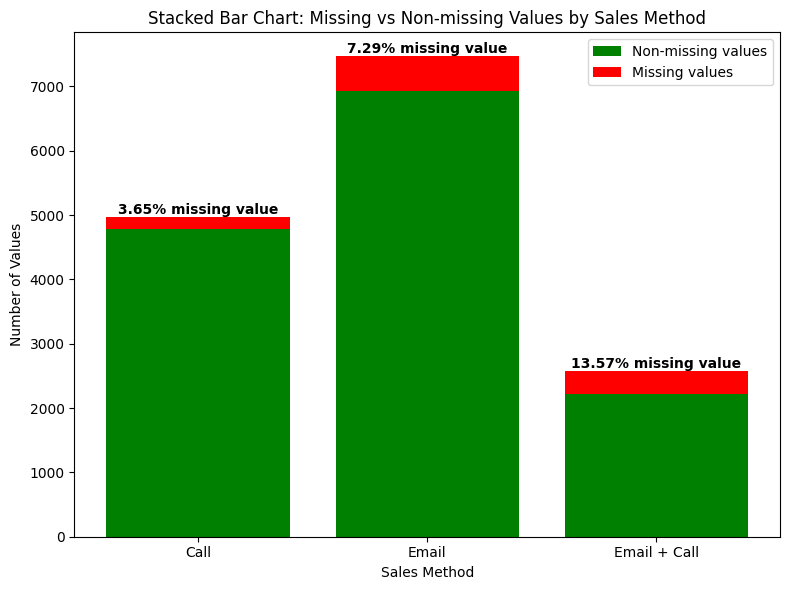

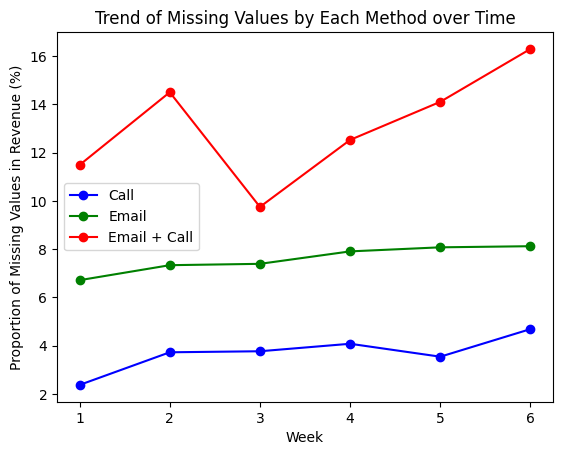


There is insight that missing values may depends on sales method but it's need to check this because deleting missing values can leads to loss of important information.


In [5]:
# Proportion of missing values.
missing_by_method = sales[sales['revenue'].isna()].groupby('sales_method').size()
# print('\nMissing values by each method:\n', missing_by_method)
total_by_method = sales.groupby('sales_method').size()
# print('\nTotal values by overall methods:\n', total_by_method)
proportion_by_method = round(missing_by_method / total_by_method * 100, 2)
print(f"\nProportion of missing values by method:\n'Call' - {proportion_by_method['Call']}%, "
                                                f"\n'Email' - {proportion_by_method['Email']}%, "
                                                f"\n'Email + Call' - {proportion_by_method['Email + Call']}%.")

# Data
# methods = ['Call', 'Email', 'Email + Call']
missing_values = np.array([181, 544, 349])
total_values = np.array([4962, 7466, 2572])

# Calculate non-missing values (total_values - missing_values)
non_missing_values = total_values - missing_values
sales_method = ['Call', 'Email', 'Email + Call']
# Create Stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(sales_method, non_missing_values, label='Non-missing values', color='green')
plt.bar(sales_method, missing_values, bottom=non_missing_values, label='Missing values', color='red')

# Chart settings
plt.title('Stacked Bar Chart: Missing vs Non-missing Values by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Values')
plt.legend()

# Position for the text above the bar (y = total values)
plt.text(0, total_values[0], f"{proportion_by_method['Call']}% missing value", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.text(1, total_values[1], f"{proportion_by_method['Email']}% missing value", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.text(2, total_values[2], f"{proportion_by_method['Email + Call']}% missing value", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Display the chart
plt.tight_layout()
plt.show()

# Percentage of missing values by weeks and sales methods
grouped_revenue = sales.groupby(['week', 'sales_method']).size()
grouped_revenue_missing = sales[sales['revenue'].isna()].groupby(['week', 'sales_method']).size()
proportion_grouped_revenue = (grouped_revenue_missing / grouped_revenue * 100).reset_index().sort_values(by=['week', 'sales_method', 0], ascending=[True, True, False])
proportion_grouped_revenue = proportion_grouped_revenue.rename(columns={0: 'missing_values, %'})
# print('\n', proportion_grouped_revenue)

# Missing values just for Email + Call.
call_sales = sales[sales['sales_method'] == 'Call']
email_sales = sales[sales['sales_method'] == 'Email']
email_call_sales = sales[sales['sales_method'] == 'Email + Call']

# Function for % calculation by revenue.
def calculate_missing_percentage(data, column='revenue'):
    total_by_week = data.groupby('week').size()
    missing_by_week = data[data[column].isna()].groupby('week').size()
    return (missing_by_week / total_by_week) * 100

percent_missing_by_week_call = calculate_missing_percentage(call_sales)
percent_missing_by_week_email = calculate_missing_percentage(email_sales)
percent_missing_by_week_call_email = calculate_missing_percentage(email_call_sales)

# missing_per_week
# Graph.
plt.plot(percent_missing_by_week_call.index, percent_missing_by_week_call.values, label='Call', color='blue', marker='o')
plt.plot(percent_missing_by_week_email.index, percent_missing_by_week_email.values, label='Email', color='green', marker='o')
plt.plot(percent_missing_by_week_call_email.index, percent_missing_by_week_call_email.values, label='Email + Call', color='red', marker='o')
plt.xlabel('Week')
plt.ylabel('Proportion of Missing Values in Revenue (%)')
plt.title('Trend of Missing Values by Each Method over Time')
plt.legend()
plt.show()

print("\nThere is insight that missing values may depends on sales method but it's need to check this because deleting missing values can leads to loss of important information.")

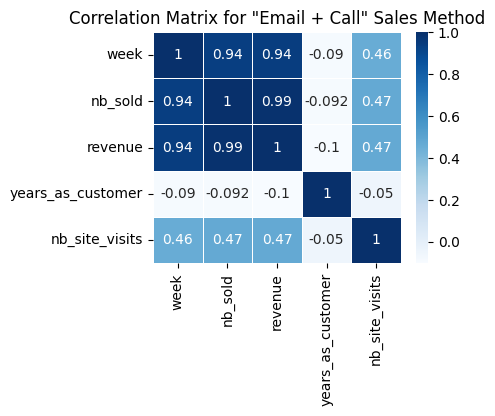

In [6]:
# 1. Correlation matrix
correlation_matrix_email_call = sales[sales['sales_method'] == 'Email + Call'][['week', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']].corr()
# print('Correlation with "revenue":\n', correlation_matrix_email_call['revenue'])

# Visualization of the correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix_email_call, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix for "Email + Call" Sales Method')
plt.show()

# Result
# print(final_result)

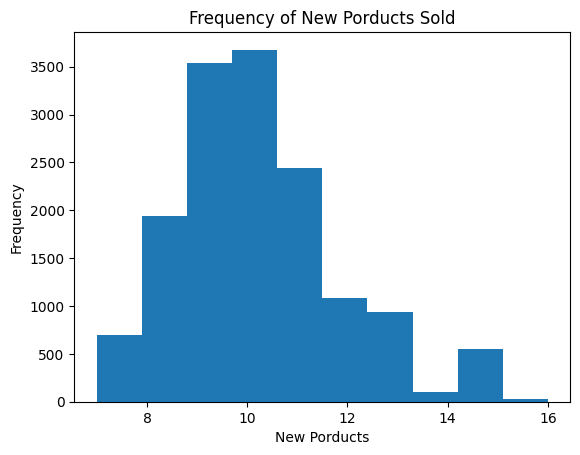

In [7]:
graph = sales.nb_sold.plot.hist()
graph.set_title('Frequency of New Porducts Sold')
graph.set_xlabel('New Porducts')
plt.show()

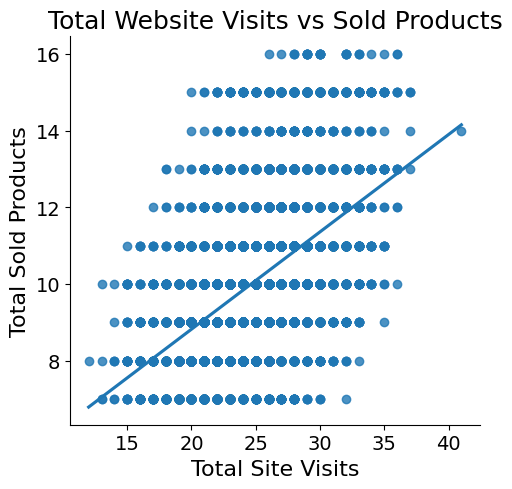

In [8]:
# Scatter plot with regression line
sns.lmplot(x='nb_site_visits', y='nb_sold', ci=None, data=sales)
plt.title('Total Website Visits vs Sold Products', fontsize=18)
plt.xlabel('Total Site Visits', fontsize=16)
plt.ylabel('Total Sold Products', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

# Correlation with state.
- The graph below is large and with lots of data, but the most important thing here is that different colours are different sales methods and all it says that customers are spread evenly across the states.

![States Distribution](States%20Distribution.png)

In [9]:
from scipy.stats import shapiro, kruskal

threshold = 0.05
def test_revenue_by_state(df):
    # Grouping data by states
    states_revenue = {state: df[df['state'] == state]['revenue'].dropna() for state in df['state'].unique()}
    
    # Shapiro-Wilk Test for Normality
    normal_states = {}
    for state, revenue in states_revenue.items():
        stat, p_value = shapiro(revenue)
        normal_states[state] = p_value >= threshold  # If P-value >= 0.05, data is considered normal
    
    # Kruskal-Wallis Test for Difference in Medians
    if len(states_revenue) > 1:
        stat, p_value = kruskal(*states_revenue.values())
        if p_value < threshold:
            print(f"p_value: {p_value:.2f}. There are significant differences (reject null hypothesis) between revenue and states.")
        else:
            print(f"p_value: {p_value:.2f}. There are not significant differences (accept null hypothesis) between revenue and states.")
    else:
        print("Not enough states to perform Kruskal-Wallis test.")

    return normal_states

# Apply the function to your DataFrame
normal_states = test_revenue_by_state(sales)

# Visualization of states with normal distribution
normal_distribution_states = tuple(state for state, is_normal in normal_states.items() if is_normal)
non_normal_distribution_states = tuple(state for state, is_normal in normal_states.items() if not is_normal)

# Output the lengths and messages
if normal_distribution_states and non_normal_distribution_states:
    print(f"States with normal distribution: {len(normal_distribution_states)}")
    print(f"States with non-normal distribution: {len(non_normal_distribution_states)}")
elif not normal_distribution_states:
    print("All states have non-normal distribution that's the reason to use Kruskal-Wallis Test.")
elif not non_normal_distribution_states:
    print("All states have normal distribution.")

# normal_distribution_states, non_normal_distribution_states
print("\nSince the available correlations with numeric variables are obvious (more site visits, more sales, more revenue), as well as the correlation between missing values and states is not statistically significant, I replace nan-values for all sales methods with the median revenue value for each method grouped by week.")

p_value: 0.30. There are not significant differences (accept null hypothesis) between revenue and states.
All states have non-normal distribution that's the reason to use Kruskal-Wallis Test.

Since the available correlations with numeric variables are obvious (more site visits, more sales, more revenue), as well as the correlation between missing values and states is not statistically significant, I replace nan-values for all sales methods with the median revenue value for each method grouped by week.


In [10]:
# Fill missing values of revenue with grouping on week and sales_method.
sales['revenue'] = sales.groupby(['week', 'sales_method'])['revenue'].transform(lambda x: x.fillna(x.median()))
sales.describe(include='all').fillna('-')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.0,15000,15000,15000.0,15000.0,15000.0,15000.0,15000
unique,-,3,15000,-,-,-,-,50
top,-,Email,2e72d641-95ac-497b-bbf8-4861764a7097,-,-,-,-,California
freq,-,7466,1,-,-,-,-,1872
mean,3.098267,-,-,10.084667,95.676532,4.963933,24.990867,-
std,1.65642,-,-,1.812213,48.371754,5.027211,3.500914,-
min,1.0,-,-,7.0,32.54,0.0,12.0,-
25%,2.0,-,-,9.0,52.76,1.0,23.0,-
50%,3.0,-,-,10.0,90.205,3.0,25.0,-
75%,5.0,-,-,11.0,108.09,7.0,27.0,-


# Q1: How many customers were there for each approach?

After recovering the missing data, the total number of customers remained the same at 15,000.


- **_Email_** is the most popular, 7,466 customers have chosen this method. The method is cheap, easy to execute.

- **_Call_** is less popular method, 4,962 customers despite the cost of execution time per customer.

- **_Email + Call_** Least customers - 2572. Either because of the complexity of execution or the different buying ability of the customers.

The conclusions are supported by a graph 'Total Customers for all Sales Method'.

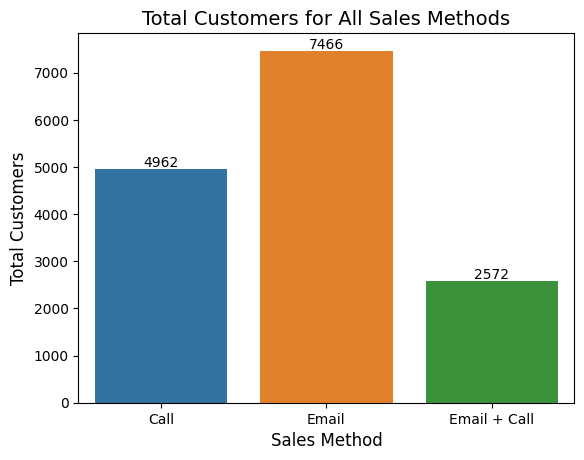

In [11]:
# 1) How many customers were there for each approach?
customer_count_by_method = sales.groupby('sales_method')['customer_id'].nunique().reset_index(name='total_customers')
# customer_count_by_method

sns.barplot(x='sales_method', y='total_customers', data=customer_count_by_method)

for index, row in customer_count_by_method.iterrows():
    plt.text(index, row['total_customers'] + 50, round(row['total_customers'], 0), 
             color='black', ha="center", fontsize=10)

plt.title('Total Customers for All Sales Methods', fontsize=14)
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Total Customers', fontsize=12)
plt.show()

# Q2: What does the spread of the revenue look like overall? And for each method?

- **_Email + Call_** method generates the most revenue, although the number of customers for this method is smaller than for the other methods. This may indicate that, despite the smaller reach, this method is more focused on high-income customers or more complex transactions like I said before.
- **_Email_** is a balanced method.
- **_Call_** brings the lowest revenue.

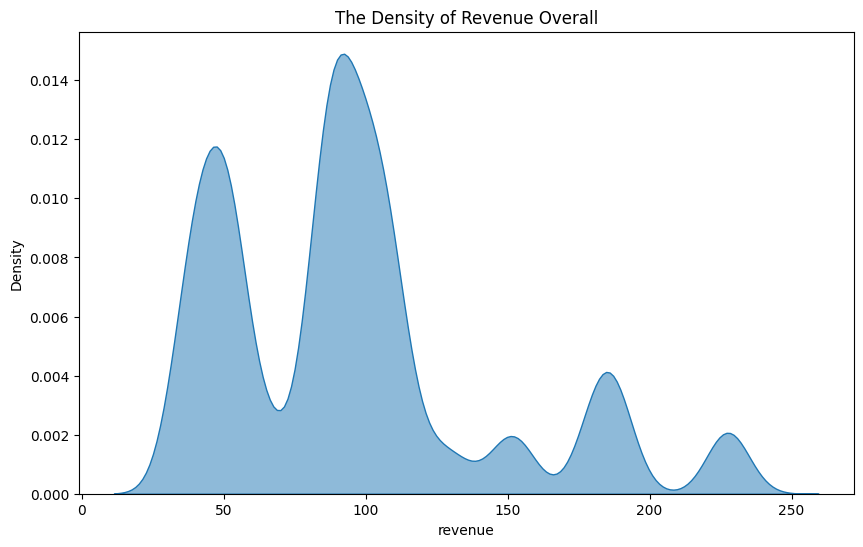

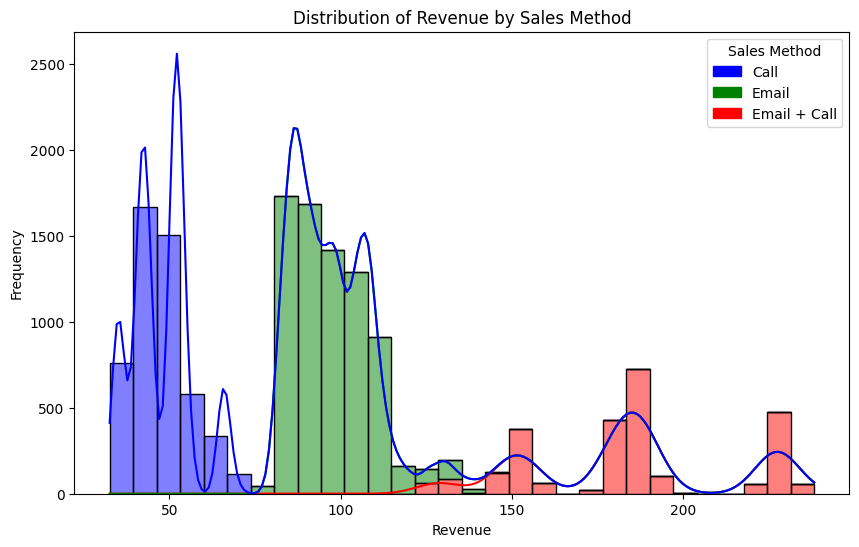

In [12]:
import matplotlib.patches as mpatches

# All methods.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sales, x='revenue', alpha=0.5, fill=True)
plt.title('The Density of Revenue Overall')
plt.show()

colors = {
    'Call': 'blue',
    'Email': 'green',
    'Email + Call': 'red'
}
hue_order = ['Call', 'Email', 'Email + Call']
# Each method.
plt.figure(figsize=(10, 6))
sns.histplot(data=sales, x='revenue', hue='sales_method', bins=30, kde=True, multiple="stack", hue_order=hue_order, palette=colors)
plt.title('Distribution of Revenue by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
legend_handles = [mpatches.Patch(color=colors[method], label=method) for method in hue_order]
plt.legend(handles=legend_handles, title='Sales Method')
plt.show()

(Graphs 'Box Plot of Ravenue by Sales Method' and 'Total Revenue by Sales Method' below)

- **_Call_**: The smallest interquartile range of $11.23 indicates that the income for this method is stable and within a narrow range. The income spread is also small, indicating low income variability.

- **_Email_**: the IQR is $17.62, indicating a wider range of income compared to the Call method. This indicates a greater variability of income for this method.

- **_Email + Call_**: IQR is $35.34, the highest value, indicating the largest revenue range among the methods. This indicates a wide variation in revenue.

As a result, it can be concluded that **_Email + Call_** is the most profitable sales method despite its complexity. **_Email_** is a more mass method with good potential, while **_Call_** should be used when other methods are insufficient to interact with customers.

   sales_method     revenue
0          Call  236358.110
1         Email  725050.245
2  Email + Call  473739.630


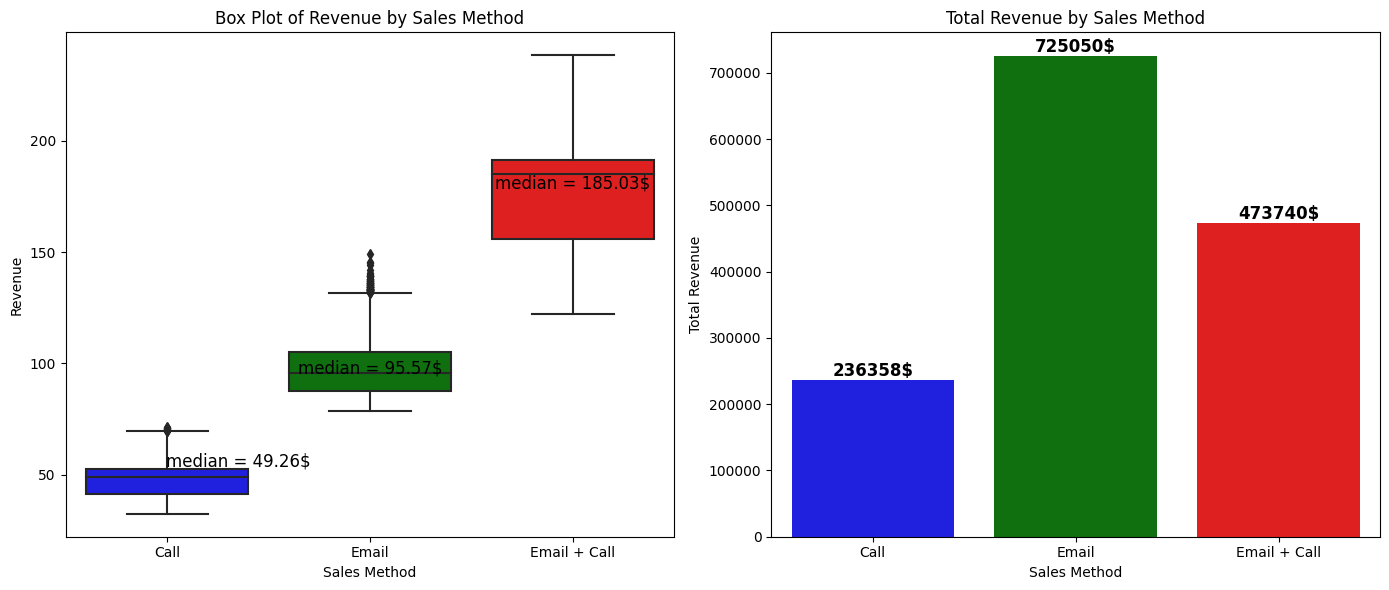

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
sns.boxplot(data=sales, x='sales_method', y='revenue', palette=colors, order=hue_order, ax=axs[0])
axs[0].set_title('Box Plot of Revenue by Sales Method')
axs[0].set_xlabel('Sales Method')
axs[0].set_ylabel('Revenue')

IQRs = []
for i, method in enumerate(hue_order):
    method_data = sales[sales['sales_method'] == method]['revenue']
    mean_val = method_data.median()
    Q1 = method_data.quantile(0.25)
    Q3 = method_data.quantile(0.75)
    IQR = Q3 - Q1
    IQRs.append(IQR)
    
    if not i:
        i += 0.35
        mean_pos = mean_val + 4.5
    elif i == 2:
        mean_pos = mean_val - 6.5
    else:
        mean_pos = mean_val
        
    axs[0].text(i, mean_pos, f'median = {mean_val:.2f}$', horizontalalignment='center', fontsize=12, color='black')
    # axs[0].text(i, IQR + 20, f'IQR = {IQR:.2f}$', horizontalalignment='center', fontsize=12, color='black')

# print(IQRs)

# Total revenue.
sales_grouped_sum = sales.groupby('sales_method')['revenue'].sum().reset_index() 
print(sales_grouped_sum)
# Bar chart
sns.barplot(data=sales_grouped_sum, x='sales_method', y='revenue', palette=colors, order=hue_order, ax=axs[1])
# Digits on the top of the each bars.
for index, value in enumerate(sales_grouped_sum['revenue']):
    axs[1].text(index, value, f'{value:.0f}$', ha='center', va='bottom', fontsize=12, fontweight='bold')

axs[1].set_title('Total Revenue by Sales Method')
axs[1].set_xlabel('Sales Method')
axs[1].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

# Q3: Was there any difference in revenue over time for each of the methods?
(Graph 'Revenue per Week' below)

- **_Call_** method is stable, but with low performance compared to the others.
- **_Email_** method shows good results at the start, but loses its position sharply after the first weeks.
- **_Email + Call_** method shows the best potential in terms of both number of sales and revenue, especially in the long term.

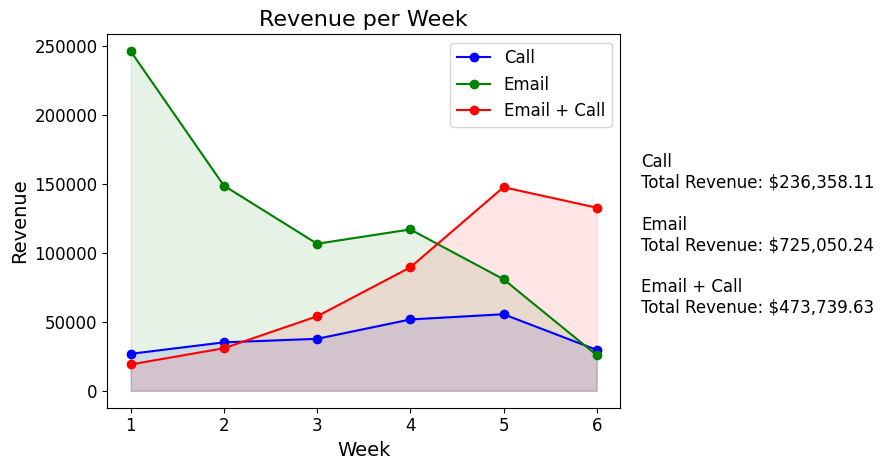

In [14]:
# 3) Was there any difference in revenue over time for each of the methods?
grouped_by_method = sales.groupby(['week', 'sales_method']).agg(
    total_customers=('customer_id', 'nunique'),  # Unique customers
    total_nb_sold=('nb_sold', 'sum'),  # Total units sold
    total_revenue=('revenue', 'sum')  # Total revenue
).reset_index()

# Create two figures: one for the number of sales and one for revenue
# fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

colors = {
    'Call': 'blue',
    'Email': 'green',
    'Email + Call': 'red'
}

# First chart: number of units sold
# for method in grouped_by_method['sales_method'].unique():
#     method_data = grouped_by_method[grouped_by_method['sales_method'] == method]
#     axs[0].plot(method_data['week'], method_data['total_nb_sold'], label=method, color=colors[method], marker='o')
#     axs[0].fill_between(method_data['week'], method_data['total_nb_sold'], color=colors[method], alpha=0.1)

# axs[0].set_ylabel('Number of Sales', fontsize=16)
# axs[0].set_title('Number of Sales per Week', fontsize=18)
# axs[0].tick_params(axis='both', labelsize=14)
# axs[0].legend(fontsize=14)

# Second chart: revenue
for method in colors.keys():
    method_data = grouped_by_method[grouped_by_method['sales_method'] == method]
    plt.plot(method_data['week'], method_data['total_revenue'], label=method, color=colors[method], marker='o')
    plt.fill_between(method_data['week'], method_data['total_revenue'], color=colors[method], alpha=0.1)

# axs[1].set_xlabel('Week', fontsize=16)
# axs[1].set_ylabel('Revenue', fontsize=16)
# axs[1].set_title('Revenue per Week', fontsize=18)
# axs[1].tick_params(axis='both', labelsize=14)
# axs[1].legend(fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Revenue per Week', fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)

call_method = grouped_by_method[grouped_by_method['sales_method'] == 'Call']
total_sold_call = call_method['total_nb_sold'].sum()
total_revenue_call = call_method['total_revenue'].sum()

email_method = grouped_by_method[grouped_by_method['sales_method'] == 'Email']
total_sold_email = email_method['total_nb_sold'].sum()
total_revenue_email = email_method['total_revenue'].sum()

email_call_method = grouped_by_method[grouped_by_method['sales_method'] == 'Email + Call']
total_sold_email_call = email_call_method['total_nb_sold'].sum()
total_revenue_email_call = email_call_method['total_revenue'].sum()
# Adding overall text on the right
# text_str = f"Call\nTotal Sold: {total_sold_call}\nTotal Revenue: ${total_revenue_call:,.2f}\n\n" \
#            f"Email\nTotal Sold: {total_sold_email}\nTotal Revenue: ${total_revenue_email:,.2f}\n\n" \
#            f"Email + Call\nTotal Sold: {total_sold_email_call}\nTotal Revenue: ${total_revenue_email_call:,.2f}"
text_str = f"Call\nTotal Revenue: ${total_revenue_call:,.2f}\n\n" \
           f"Email\nTotal Revenue: ${total_revenue_email:,.2f}\n\n" \
           f"Email + Call\nTotal Revenue: ${total_revenue_email_call:,.2f}"

# Displaying the text on the chart
plt.gcf().text(1.01, 0.5, text_str, fontsize=12, va='center')

plt.tight_layout()
plt.show()

# Conclusion

In conclusion, I would like to say that, based on the analysis:

- **_Email + Call_** is the most effective sales method, which despite being complex and having a high probability of missing values, provides the best revenue and sales growth.
- **_Call_** and **_Email_** methods have shown less effective results. It is worth considering their use for narrower customer segments.

# Business Metrics

Since the most important thing is revenue, then I suggest that the main business metric be the **_median_** revenue value.
- **_Call_** method showed the lowest result, even though it takes the most time. The median value was $49.26.
- **_Email_** method is already better - $95.57 is a good result along with the ease of this sales method in execution.
- **_Email + Call_** method had the best result - $185.03.

Despite the complexity of the last method and the lack of surges (extremely high rates) in customer visits to the site or the number of products sold, in the long run this method of sales will lead to the desired result, i.e. high income.

# Recommendations

- I recommend to monitor the **_percentage of missing values_** in the methods and take it into account when choosing a sales strategy.
- Also suggest that businesses **increase** the use of **_Email + Call_** method to maximise returns. 
- Recommend adding a metric such as **_order amount_** and **_product price_** so you can differentiate between customers by buying ability, because it's still not clear why there are so few customers using the **_Email + Call_** selling method.
- Continue to use the **_Email_** method. It's highly profitable and easy to execute. The genius of it is simple.
- Refuse to use the **_Call_** sales method because of its low efficiency.